<a href="https://colab.research.google.com/github/Omar-Abd-Elwahab/VCF_filter/blob/main/testing_t1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Opening the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r ./drive/MyDrive/Colab\ Notebooks/deepref/snp_model_save/ $PWD

In [ ]:
import os

# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = './snp_model_save/'


In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 121.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import transformers
from transformers import BertConfig, BertModel, BertTokenizer,  BertForSequenceClassification

In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    print('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
# Load a trained model and vocabulary that you have fine-tuned
model = BertForSequenceClassification.from_pretrained(output_dir)
tokenizer = BertTokenizer.from_pretrained(output_dir)

# Copy the model to the GPU.
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30567, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-5): 6 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, e

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [ ]:
!cp ./drive/MyDrive/Colab\ Notebooks/deepref/hg003_snps.csv /content

In [ ]:
import pandas as pd
# Load the dataset into a pandas dataframe.
tst = pd.read_csv("hg003_snps.csv", low_memory=False)
tst = tst.drop(tst.columns[[0]], axis=1)

# Report the number of sentences.
print('Number of training lines: {:,}\n'.format(tst.shape[0]))

# Display 10 random rows from the data.
tst.sample(3)
tst = tst[1:]

Number of training lines: 10,787,570



In [ ]:
import pandas as pd

tst = tst.sample(2000000, random_state=42)
# Report the number of sentences.
print(tst.groupby('FILTER').size())

# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(tst.shape[0]))



# Get all column names except the one to exclude
columns_to_merge = [col for col in tst.columns if col != 'FILTER']

# Define a lambda function to merge the values of selected columns
merge_columns = lambda row: ' '.join(str(row[col]) for col in columns_to_merge)

# Merge columns using the defined function
tst['merged_column'] = tst.apply(merge_columns, axis=1)

# Drop the original columns
tst = tst.drop(columns=columns_to_merge)

# Print the resulting DataFrame
print(tst.sample(3))

# Create sentence and label lists
sentences = tst.merged_column.values
labels = tst.FILTER.values
labels = labels.astype(np.int64)

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in sentences:
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                   )

    input_ids.append(encoded_sent)



FILTER
0    1728590
1     271410
dtype: int64
Number of test sentences: 2,000,000

        FILTER                                      merged_column
1452294      0  C T 357 FR=1.0;MMLQ=38.0;TCR=8;HP=1;WE=1291481...
7099448      0  T C 221.64 AC=1;AF=0.5;AN=2;BaseQRankSum=1.668...
1540182      0  C T 302 FR=1.0;MMLQ=33.0;TCR=6;HP=4;WE=2971129...


In [ ]:
import tensorflow as tf
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.utils import pad_sequences
MAX_LEN = 190
# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN,
                          dtype="long", truncating="post", padding="post")

# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)

# Convert to tensors.
prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(labels)

# Set the batch size.
batch_size = 1024

# Create the DataLoader.
prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [ ]:
import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import time
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs)))
t0 = time.time()

# Put model in evaluation mode
model.eval()

# Initialize variables for the confusion matrix
all_preds = []
all_labels = []
all_probabilities = []
# Tracking variables
predictions , true_labels = [], []

# Predict
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)

  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch

  # Telling the model not to compute or store gradients, saving memory and
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None,
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  # Append predictions and labels to calculate the confusion matrix
  all_preds.extend(np.argmax(logits, axis=1))
  all_labels.extend(label_ids)

  # Append probability scores for ROC curve
  probabilities = torch.softmax(torch.from_numpy(logits), dim=1)
  all_probabilities.extend(probabilities[:, 1].cpu().numpy())
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')
print("  Testing took: {:}".format(format_time(time.time() - t0)))



Predicting labels for 2,000,000 test sentences...
    DONE.
  Testing took: 3:12:50


Confusion Matrix:
[[1688944   39646]
 [ 121425  149985]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95   1728590
           1       0.79      0.55      0.65    271410

    accuracy                           0.92   2000000
   macro avg       0.86      0.76      0.80   2000000
weighted avg       0.91      0.92      0.91   2000000

Accuracy score:
0.9194645
Weighted precision_recall_f1score:
(0.913658304235254, 0.9194645, 0.9132523615687645, None)
ROC AUC Score: 0.84996


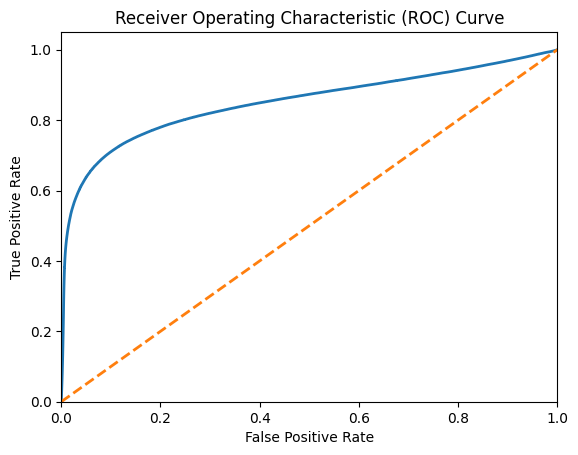

In [ ]:
# Flatten the predictions and true labels
flat_predictions = np.concatenate(predictions, axis=0)
flat_true_labels = np.concatenate(true_labels, axis=0)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(all_labels, all_preds)

print("Confusion Matrix:")
print(confusion_mat)

print(classification_report(all_labels, all_preds))
print("Accuracy score:")
print(accuracy_score(all_labels, all_preds))
print("Weighted precision_recall_f1score:")
print(precision_recall_fscore_support(all_labels, all_preds, average = 'weighted'))

# Calculate ROC AUC score
roc_auc = roc_auc_score(all_labels, all_probabilities, average='weighted')

print(f"ROC AUC Score: {roc_auc:.5f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(flat_true_labels, all_probabilities)

plt.figure()
plt.plot(fpr, tpr, lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):

  # The predictions for this batch are a 2-column ndarray (one column for "0"
  # and one column for "1"). Pick the label with the highest value and turn this
  # in to a list of 0s and 1s.
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()

  # Calculate and store the coef for this batch.
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)
  matthews_set.append(matthews)

Calculating Matthews Corr. Coef. for each batch...


In [ ]:
matthews_set

[0.7022001121106367,
 0.6777409781417895,
 0.7399564429552556,
 0.695133115858016,
 0.6903988017993364,
 0.7308826476949432,
 0.7220152026515468,
 0.662349971822257,
 0.7066894563659001,
 0.7539774045099765,
 0.6741047016550448,
 0.7115922022372458,
 0.6472164315003015,
 0.6874186371975995,
 0.7255396993109008,
 0.7137358289606761,
 0.6748836226827661,
 0.6766746378511874,
 0.7037071169073672,
 0.7124910450436208,
 0.6422580935099209,
 0.7220616957383722,
 0.6441604641367705,
 0.7057611008789579,
 0.7286385112313425,
 0.6620087779842806,
 0.6548695993920081,
 0.7126801561699421,
 0.6590153806908492,
 0.7059263220233201,
 0.7188371852995111,
 0.6750950030905697,
 0.7231394323014751,
 0.6927891066418321,
 0.7016031367528004,
 0.7004381174957586,
 0.7015043876389109,
 0.7770731365372635,
 0.7927203856864075,
 0.7000482708703857,
 0.776937141380818,
 0.6833328952763507,
 0.7021734445927471,
 0.7041790244146904,
 0.6715501692621103,
 0.7158703049389162,
 0.6816218973379065,
 0.7226428211484

In [ ]:
# Combine the predictions for each batch into a single list of 0s and 1s.
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = [item for sublist in true_labels for item in sublist]

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('MCC: %.5f' % mcc)

MCC: 0.61920
